Source: https://s3.amazonaws.com/quantstart/media/powerpoint/an-introduction-to-backtesting.pdf

In [23]:
import datetime
import pandas as pd
import quandl
import numpy as np


import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
# use google finance as data source
ibm = quandl.get('WIKI/IBM') 

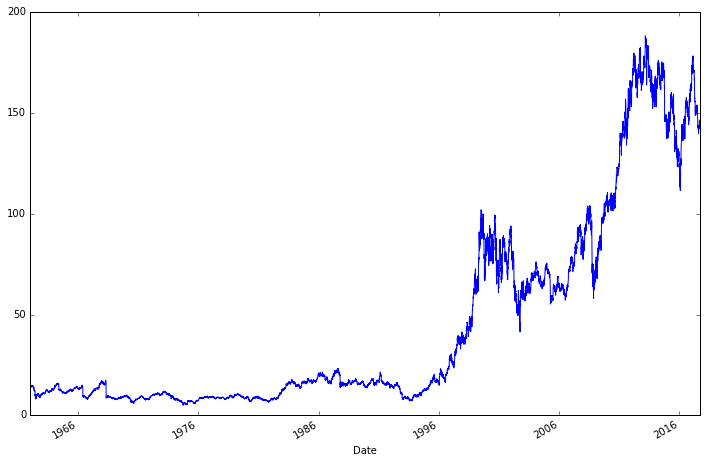

In [15]:
ibm['Adj. Close'].plot(figsize=(12, 8));

In [22]:
ibm.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1962-01-02,578.5,578.5,572.0,572.00,19360.0,0.0,1.0,15.423243,15.423243,15.249948,15.249948,387200.0
1962-01-03,572.0,577.0,572.0,577.00,14400.0,0.0,1.0,15.249948,15.383252,15.249948,15.383252,288000.0
1962-01-04,577.0,577.0,571.0,571.25,12800.0,0.0,1.0,15.383252,15.383252,15.223287,15.229953,256000.0
1962-01-05,570.5,570.5,559.0,560.00,18160.0,0.0,1.0,15.209957,15.209957,14.903358,14.930019,363200.0
1962-01-08,559.5,559.5,545.0,549.50,27200.0,0.0,1.0,14.916689,14.916689,14.530108,14.650081,544000.0


In [17]:
from abc import ABCMeta, abstractmethod

In [19]:
class Strategy(object):
    __metaclass__ = ABCMeta
    
    @abstractmethod
    def generate_signals(self):
        raise NotImplementedError("Should implement generate_signals()!")

In [ ]:
# Moving average cross in pyhton

class MovingAverageCrossStratrategy(Strategy):
    def generate_signals(self):
        # Create DataFrame and initialise signal series to zero
        signals = pd.DataFrame(index=self.bars.index)
        signals['signal'] = 0
        
        # Create the long/short simple moving averages
        signals['short_mavg'] = bars['Adj. Close'].rolling(window=self.short_window,
                                                           min_periods=1).mean()
        signals['long_mavg'] = bars['Adj. Close'].rolling(window=self.long_window,
                                                           min_periods=1).mean()
        
        # When the short SMA exceeds the long SMA, set the 'signal' Series to 1 (else 0)
        signals['signal'][self.short_window:] = 
            np.where(signals['shor_mavg'][self.short_window:] >
                                signals['shor_mavg'][self.short_window:], 1, 0)
        
        # take the difference of the signals in order to generate actual trading orders